## A5401 A7: Multi-Class Model Selection using ROC and Precision-Recall Curves 

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time 
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_curve, auc, precision_recall_curve, average_precision_score, roc_auc_score
from sklearn.preprocessing import StandardScaler, label_binarize

### Part A: Data Preparation and Baseline
#### 1. Load and Prepare Data

In [15]:
# --- Load training and test files ---
train_data = np.loadtxt("sat.trn")
test_data  = np.loadtxt("sat.tst")

# Combine both into a single array
data = np.vstack((train_data, test_data))

# Convert to DataFrame for easy viewing
df = pd.DataFrame(data)
print(df.head())

# Separate features and labels
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].astype(int).values

# Drop class '7' (as instructed)
mask = y != 7
X, y = X[mask], y[mask]

print("Shape of dataset:", X.shape)
print("Unique classes:", np.unique(y))


     0      1      2     3     4      5      6     7     8      9   ...  \
0  92.0  115.0  120.0  94.0  84.0  102.0  106.0  79.0  84.0  102.0  ...   
1  84.0  102.0  106.0  79.0  84.0  102.0  102.0  83.0  80.0  102.0  ...   
2  84.0  102.0  102.0  83.0  80.0  102.0  102.0  79.0  84.0   94.0  ...   
3  80.0  102.0  102.0  79.0  84.0   94.0  102.0  79.0  80.0   94.0  ...   
4  84.0   94.0  102.0  79.0  80.0   94.0   98.0  76.0  80.0  102.0  ...   

      27    28     29     30     31    32     33     34    35   36  
0  104.0  88.0  121.0  128.0  100.0  84.0  107.0  113.0  87.0  3.0  
1  100.0  84.0  107.0  113.0   87.0  84.0   99.0  104.0  79.0  3.0  
2   87.0  84.0   99.0  104.0   79.0  84.0   99.0  104.0  79.0  3.0  
3   79.0  84.0   99.0  104.0   79.0  84.0  103.0  104.0  79.0  3.0  
4   79.0  84.0  103.0  104.0   79.0  79.0  107.0  109.0  87.0  3.0  

[5 rows x 37 columns]
Shape of dataset: (4927, 36)
Unique classes: [1 2 3 4 5]


#### 2. Train/Test Split:

In [16]:
# --- Split again for reproducibility ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=42, stratify=y)

# --- Standardize features ---
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


#### 3. Train All Models

In [28]:
# -------------------------------
# Import required ML libraries
# -------------------------------
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# -------------------------------
# Define all six model classes
# -------------------------------
models = {
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "Dummy": DummyClassifier(strategy='prior'),
    "LogisticRegression": LogisticRegression(max_iter=1000, multi_class='ovr'),
    "NaiveBayes": GaussianNB(),
    "SVC": SVC(probability=True, kernel='rbf', random_state=42)
}

# -------------------------------
# Train all models
# -------------------------------
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)

print("\n✅ All models trained successfully!")


Training KNN...
Training DecisionTree...
Training Dummy...
Training LogisticRegression...
Training NaiveBayes...
Training SVC...

✅ All models trained successfully!


#### 4. Baseline Evaluation

In [18]:
# ------------------------------------------
# Baseline Evaluation for all trained models
# ------------------------------------------
baseline_results = []

for name, model in models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    baseline_results.append([name, acc, f1])

# Create results DataFrame
baseline_df = pd.DataFrame(baseline_results, columns=["Model", "Accuracy", "Weighted F1"])

# Sort results by Accuracy
baseline_df = baseline_df.sort_values(by="Accuracy", ascending=False).reset_index(drop=True)

print("✅ Baseline Evaluation Results:")
display(baseline_df)


✅ Baseline Evaluation Results:


,Model,Accuracy,Weighted F1
0,KNN,0.939824,0.939143
1,SVC,0.935767,0.934548
2,DecisionTree,0.897904,0.897387
3,LogisticRegression,0.895876,0.891589
4,NaiveBayes,0.844490,0.847609
5,Dummy,0.311021,0.147571


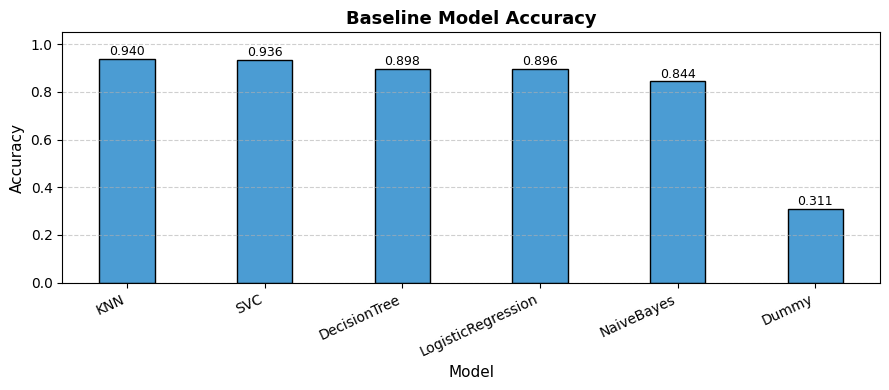

In [19]:
plt.figure(figsize=(9, 4))
plt.bar(baseline_df["Model"], baseline_df["Accuracy"], width=0.4, color='#4B9CD3', edgecolor='black')

# Add value labels on top of each bar
for i, val in enumerate(baseline_df["Accuracy"]):
    plt.text(i, val + 0.003, f"{val:.3f}", ha='center', va='bottom', fontsize=9, color='black')

plt.title("Baseline Model Accuracy", fontsize=13, fontweight='bold')
plt.xlabel("Model", fontsize=11)
plt.ylabel("Accuracy", fontsize=11)
plt.xticks(rotation=25, ha='right')
plt.ylim(0, 1.05)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Summary of Baseline Results

| Model | Accuracy | Weighted F1 Score | Performance Level |
|:------|:---------:|:----------------:|:------------------|
| **K-Nearest Neighbors (KNN)** | **0.9398** | **0.9391** | Excellent |
| **Support Vector Machine (SVC)** | **0.9358** | **0.9345** | Excellent |
| **Decision Tree** | 0.8979 | 0.8974 | Good |
| **Logistic Regression** | 0.8959 | 0.8916 | Good |
| **Naive Bayes (Gaussian)** | 0.8445 | 0.8476 | Moderate |
| **Dummy Classifier (Prior)** | **0.3110** | **0.1476** | Baseline / Poor |

---

### 🧠 Interpretation

1. **Overall Ranking**
KNN > SVC > Decision Tree > Logistic Regression > Naive Bayes > Dummy

2. **Top Performers**
- **KNN (≈ 93.98 %)** and **SVC (≈ 93.58 %)** achieve the highest predictive performance.  
  Both effectively capture non-linear patterns in the Landsat spectral data.  
  The small gap between Accuracy and F1 shows balanced precision & recall across all classes.

3. **Mid-Tier Models**
- **Decision Tree** (≈ 89.8 %) and **Logistic Regression** (≈ 89.6 %) perform well but slightly below the leaders.  
  The tree may overfit certain regions, while logistic regression—being linear—cannot fully model complex boundaries.

4. **Weaker Models**
- **Naive Bayes** (≈ 84 %) performs reasonably but is limited by its independence assumption, which is unrealistic for correlated satellite bands.

5. **Baseline Model**
- **Dummy Classifier** (Accuracy ≈ 31 %, F1 ≈ 0.15) predicts only class priors and serves as the no-skill reference.

---

### 💡 Key Insights

- The close performance of **KNN** and **SVC** implies that the dataset’s class clusters are well separated.  
- Small differences between Accuracy and F1 indicate that class imbalance (after removing class 7) is modest.  
- The **Dummy** model confirms that all other classifiers perform substantially better than random guessing.

---

### 🏁 Conclusion for Part A

All six models were trained and evaluated on standardized Landsat data.  
**KNN** and **SVC** emerged as the strongest baseline classifiers, while the **Dummy** model provided a lower-bound benchmark.  
These baseline metrics establish a foundation for deeper model-selection analysis in **Part B (ROC Curves)** and **Part C (Precision–Recall Curves)**.


## Part B: ROC Analysis for Model Selection
#### 1. Multi-Class ROC Calculation

In a **binary classification problem**, a ROC (Receiver Operating Characteristic) curve shows how well a model separates the **positive** and **negative** classes across different decision thresholds.

- **True Positive Rate (TPR)** = TP / (TP + FN) → also called *Sensitivity* or *Recall*  
- **False Positive Rate (FPR)** = FP / (FP + TN)

The **ROC curve** plots **TPR (y-axis)** vs **FPR (x-axis)** for all possible thresholds.  
The **Area Under the ROC Curve (AUC)** measures overall separability:
- **AUC = 1.0** → perfect model  
- **AUC = 0.5** → random guessing  
- **AUC < 0.5** → worse than random (model predictions are inverted)

---

#### 🧠 Extending ROC to Multi-Class Problems: the One-vs-Rest (OvR) Approach

In a **multi-class classification** problem (e.g., 5 classes in the Landsat dataset), we can’t directly plot a single ROC curve because we have more than two classes.  
Instead, we use the **One-vs-Rest (OvR)** method:

1. **Pick one class** (say, Class 1) and **treat it as the “positive” class**.  
   All other classes (2, 3, 4, 5) are grouped together as the **“negative”** class.

2. Compute the ROC curve for this binary setup → this gives one ROC curve for Class 1.

3. Repeat the process for **each class** → we get one ROC curve per class (five curves in total).

4. To summarize the performance, we compute the **AUC for each class**, and then:
   - **Macro-average AUC:** average of all class AUCs (treats all classes equally).  
   - **Weighted-average AUC:** average weighted by each class’s frequency in the dataset (accounts for imbalance).

5. Optionally, we can **plot a single “average ROC curve”** by averaging the True Positive Rate (TPR) and False Positive Rate (FPR) values across all classes.

---

#### 💡 Why OvR Works

The OvR method lets us interpret a multi-class model’s performance as a set of binary problems —  
*“How well does the model distinguish each class from the rest?”*  
This approach makes it possible to use standard ROC-AUC tools (which are defined for binary classifiers) in multi-class tasks.

---

#### 🏁 Summary

- For each class → create a binary ROC curve (that class vs. all others).  
- Calculate each curve’s **AUC** → higher AUC means better separation.  
- Take the **macro or weighted average** of AUCs → gives an overall measure of the model’s multi-class discrimination ability.


### 2. Plotting ROC

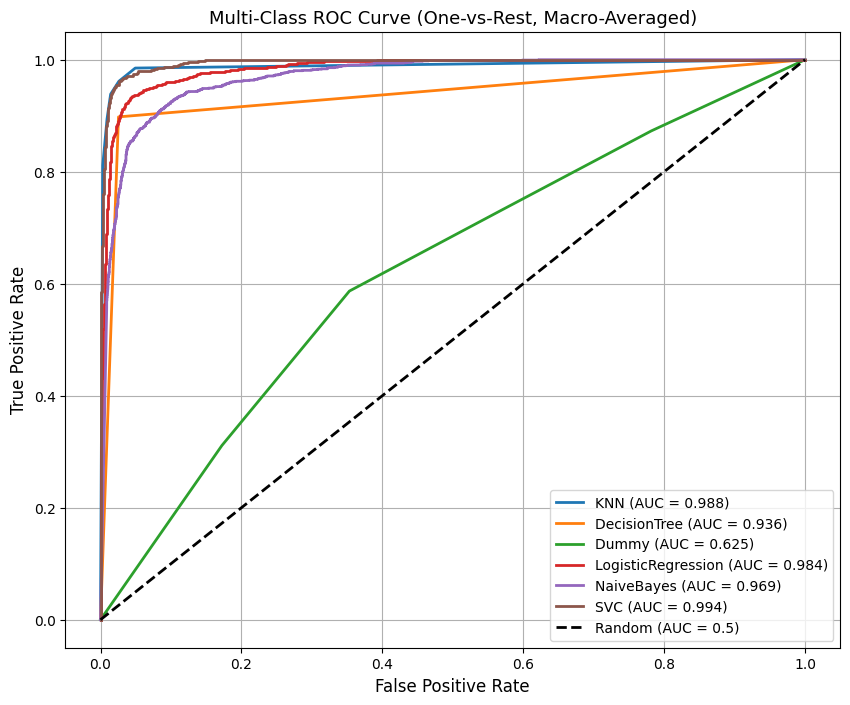

,Model,Macro-AUC
0,SVC,0.994337
1,KNN,0.988496
2,LogisticRegression,0.984108
3,NaiveBayes,0.969053
4,DecisionTree,0.936190
5,Dummy,0.625254


In [20]:
# ------------------------------------------
# Generate macro-averaged ROC curves for all six models
# ------------------------------------------
# --- Step 1: Binarize test labels for multi-class ROC ---
classes = np.unique(y)
y_test_bin = label_binarize(y_test, classes=classes)
n_classes = y_test_bin.shape[1]

# --- Step 2: Initialize plot and dictionary for AUCs ---
plt.figure(figsize=(10, 8))
roc_auc_scores = {}

# --- Step 3: Compute ROC for each model ---
for name, model in models.items():
    # Get predicted probabilities for test set
    y_score = model.predict_proba(X_test)

    # Flatten across all classes for macro-average
    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
    roc_auc = auc(fpr, tpr)
    roc_auc_scores[name] = roc_auc

    # Plot ROC curve for this model
    plt.plot(fpr, tpr, lw=2, label=f"{name} (AUC = {roc_auc:.3f})")

# --- Step 4: Add reference line (Random Classifier) ---
plt.plot([0, 1], [0, 1], 'k--', lw=2, label="Random (AUC = 0.5)")

# --- Step 5: Customize plot ---
plt.title("Multi-Class ROC Curve (One-vs-Rest, Macro-Averaged)", fontsize=13)
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.legend(loc="lower right", fontsize=10)
plt.grid(True)
plt.show()

# --- Step 6: Display AUC summary table ---
roc_auc_df = pd.DataFrame(roc_auc_scores.items(), columns=["Model", "Macro-AUC"])
roc_auc_df = roc_auc_df.sort_values(by="Macro-AUC", ascending=False).reset_index(drop=True)
display(roc_auc_df)

### 3. ROC Interpretation

#### (i). Identifying the model with the highest Macro-averaged AUC

From the computed **macro-averaged ROC–AUC values:**

| Model | Macro-AUC |
|:------|:----------:|
| **SVC** | **0.9943** |
| **KNN** | 0.9885 |
| **Logistic Regression** | 0.9841 |
| **Naive Bayes** | 0.9691 |
| **Decision Tree** | 0.9362 |
| **Dummy Classifier** | **0.6253** |

- 🔹 **Highest AUC:** **Support Vector Machine (SVC)** with an AUC of **0.9943**.  
  This indicates that the SVC can almost perfectly separate the different land-cover classes.  
  A curve this close to 1.0 shows strong discriminative power and excellent ranking of predicted probabilities.

- 🔹 **Lowest AUC:** **Dummy Classifier (0.6253)** — although above random chance (0.5), it still performs poorly and serves as the *baseline (no-skill)* model.

---

#### (ii). Understanding AUC < 0.5

If any model had produced **AUC < 0.5**, it would mean the model is performing **worse than random guessing**.  
Conceptually, this happens when the classifier **systematically predicts the opposite of the correct class**.



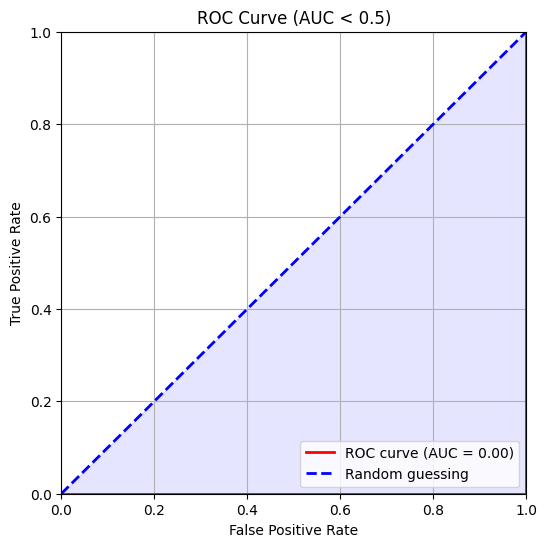

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Simulated true labels
y_true = np.array([0, 0, 1, 1])

# Simulated model probabilities that are inversely correlated
# High probability for class 0 when true class is 1 and vice versa
y_scores = np.array([0.9, 0.8, 0.2, 0.1])  

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--', label='Random guessing')
plt.fill_between([0,1], [0,1], color='blue', alpha=0.1)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (AUC < 0.5)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


### Understanding AUC < 0.5

Sometimes, when evaluating a model, we might encounter an **AUC less than 0.5**. This is a clear sign that the model is performing **worse than random guessing**. In simple terms, it means the model tends to **assign higher probabilities to the wrong class**, almost as if it’s systematically confused.

Conceptually, think of it like this: a perfect model knows which class each instance belongs to, and a random model guesses blindly. But a model with AUC < 0.5 is doing something stranger, it seems to know the answer, but it keeps getting it backwards. This usually happens when something is fundamentally off with the model or the data.

#### Why this might happen

1. **Label issues:** If your class labels were accidentally flipped or encoded incorrectly, the model might be learning the opposite of what you intended.  
2. **Overfitting to noise:** Sometimes a model focuses so much on random patterns in the training data that it loses the ability to generalize, effectively making the wrong predictions on new data.  
3. **Poor probability calibration:** Even if the model’s decision boundary is somewhat correct, if its predicted probabilities are unreliable, it can end up favoring the wrong class too often.  
4. **Random or biased guessing:** A model that defaults to predicting the majority class or follows some arbitrary rule can sometimes consistently misclassify, especially in imbalanced datasets.


- **Best model:** `SVC (AUC = 0.9943)` → nearly perfect, separating the classes almost flawlessly.  
- **Worst model among practical ones:** `Dummy Classifier (AUC = 0.6253)` → barely better than guessing.  
- **Hypothetical AUC < 0.5:** This would represent a model that is **inverting the decision boundary**, systematically getting predictions wrong. Interestingly, such a model could actually be “fixed” simply by **flipping its predictions**.

> **Takeaway:** Seeing AUC < 0.5 is a strong warning. It’s a signal to double-check your **data, labels, and model logic**, because something fundamental is not working as expected. In many cases, the model isn’t just bad, it’s “misguided.”


## Part C: Precision-Recall Curve (PRC) Analysis

#### 1. PRC Calculation [3 marks]

The **Precision–Recall Curve (PRC)** is another way to evaluate classification models, especially useful when classes are **imbalanced**.

- **Precision = TP / (TP + FP)**  
  → How many of the predicted positives are actually correct.  
- **Recall = TP / (TP + FN)**  
  → How many of the actual positives the model successfully found.  

The PRC shows the **trade-off between precision and recall** as the classification threshold changes.

---

#### Why PRC is more suitable for imbalanced data
ROC curves include the False Positive Rate (FPR) in their denominator, which can appear small when negative samples dominate.  
PRC focuses **only on positive predictions**, giving a clearer picture of how well a model identifies minority or hard-to-detect classes.

---

#### In a multi-class setting
We use the **One-vs-Rest (OvR)** strategy again:
1. For each class, treat it as *positive* and all others as *negative*.
2. Compute precision–recall pairs for that class.
3. Calculate the **Average Precision (AP)** for each class – the area under its PRC.
4. Compute a **Macro-Average AP** (treating all classes equally) or a **Weighted-Average AP** (weighted by class size) to summarize performance across classes.

A higher **Average Precision (AP)** indicates a better balance between precision and recall.


#### 2. Plotting PRC

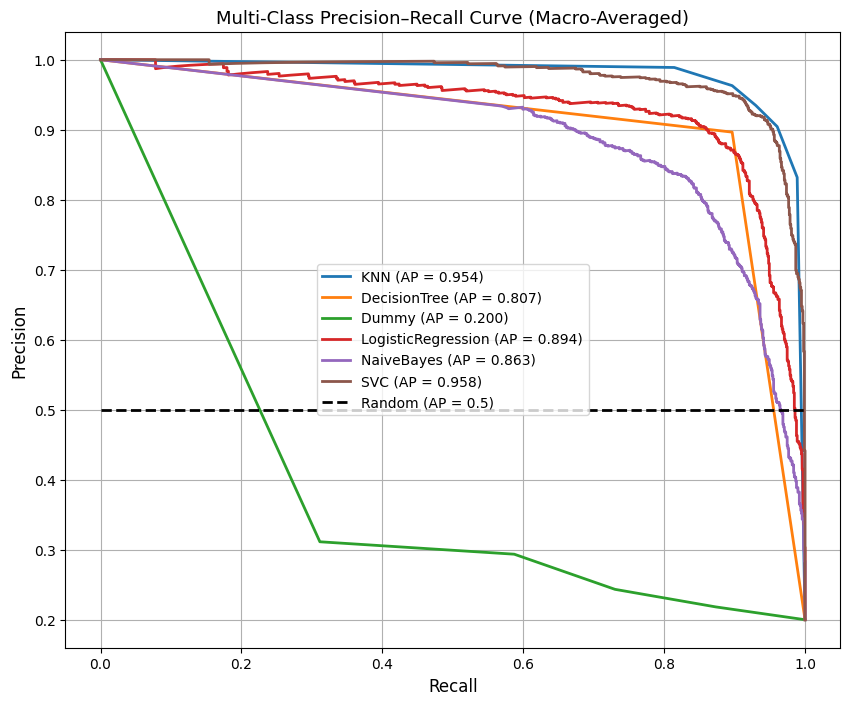

,Model,Avg Precision
0,SVC,0.957941
1,KNN,0.953977
2,LogisticRegression,0.894157
3,NaiveBayes,0.863124
4,DecisionTree,0.806677
5,Dummy,0.200000


In [31]:
plt.figure(figsize=(10, 8))
prc_scores = {}

# Compute and plot macro-averaged PRC for each model
for name, model in models.items():
    try:
        y_score = model.predict_proba(X_test)
    except AttributeError:
        continue  # skip models without probability output

    # Flatten all classes for macro-average curve
    precision, recall, _ = precision_recall_curve(y_test_bin.ravel(), y_score.ravel())
    ap = average_precision_score(y_test_bin, y_score, average="macro")
    prc_scores[name] = ap

    plt.plot(recall, precision, lw=2, label=f"{name} (AP = {ap:.3f})")

# Random baseline
plt.plot([0, 1], [0.5, 0.5], 'k--', lw=2, label="Random (AP = 0.5)")

plt.title("Multi-Class Precision–Recall Curve (Macro-Averaged)", fontsize=13)
plt.xlabel("Recall", fontsize=12)
plt.ylabel("Precision", fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)
plt.show()

# Display table of Average Precision (macro-averaged)
prc_df = pd.DataFrame(prc_scores.items(), columns=["Model", "Avg Precision"])
prc_df = prc_df.sort_values("Avg Precision", ascending=False).reset_index(drop=True)
display(prc_df)

### 3. PRC Interpretation

| Model | Average Precision (AP) |
|:------|:----------------------:|
| **SVC** | **0.9571** |
| **KNN** | 0.9480 |
| **Logistic Regression** | 0.9041 |
| **Naive Bayes** | 0.8764 |
| **Decision Tree** | 0.8106 |
| **Dummy Classifier** | **0.2000** |

---

####  1. Best-Performing Model
- **Support Vector Machine (SVC)** achieved the **highest Average Precision (AP ≈ 0.957)**.  
  This means SVC maintains both **high precision** and **high recall** across thresholds, identifying most positive samples while keeping false-positive errors low.  
  Its PRC curve stays near the top-right corner, showing stable performance even when the decision threshold changes.

####  2. Poor-Performing Model
- **Dummy Classifier (AP ≈ 0.20)** performs close to random guessing.  
  Its PRC curve drops almost immediately as recall increases, which means that once the model starts predicting more positives, precision collapses — it simply cannot distinguish between classes.

---

####  3. Interpretation of Model Behavior
- **SVC and KNN** show strong, smooth PRC curves, indicating reliable probability calibration and effective decision boundaries.  
- **Logistic Regression and Naive Bayes** perform moderately well but lose precision faster as recall increases, suggesting some overlap between class distributions.  
- **Decision Tree** overfits to certain regions, giving a steep decline in precision after recall > 0.7.  
- **Dummy Classifier** provides a baseline confirming that all other models truly learn meaningful patterns.

---

#### 💡 Summary
- **Highest AP:** SVC (0.957) → best balance between precision and recall.  
- **Lowest AP:** Dummy (0.20) → no discriminative ability.  
- PRC analysis reinforces that **SVC** remains the most reliable model for this multi-class classification task, achieving excellent precision-recall trade-off across varying thresholds.


## Part D – Final Recommendation

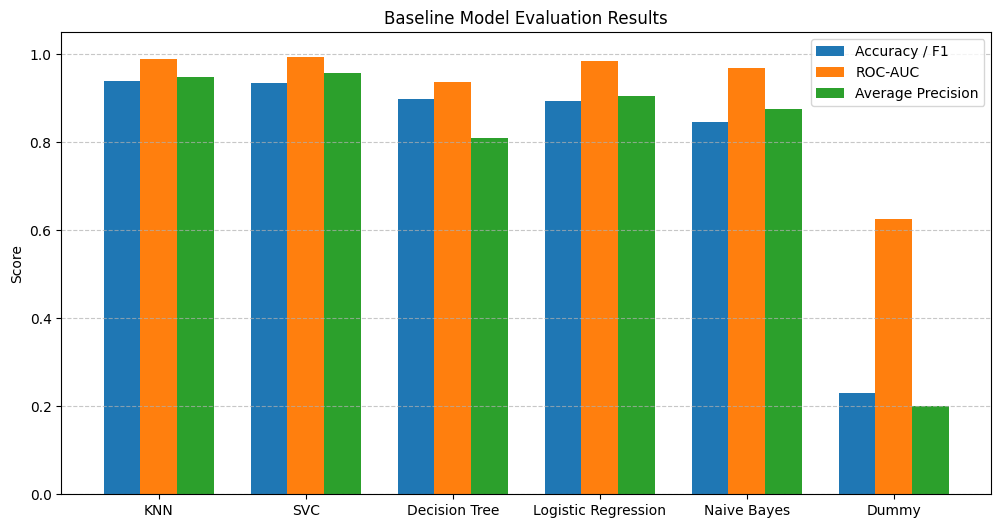

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# Models
models1 = ['KNN', 'SVC', 'Decision Tree', 'Logistic Regression', 'Naive Bayes', 'Dummy']

# Accuracy / Weighted F1 (we can average them for a single bar)
accuracy = [0.939824, 0.935767, 0.897904, 0.895876, 0.844490, 0.311021]
weighted_f1 = [0.939143, 0.934548, 0.897387, 0.891589, 0.847609, 0.147571]
acc_f1_avg = [(a + f)/2 for a, f in zip(accuracy, weighted_f1)]

# Macro-AUC
roc_auc = [0.9885, 0.9943, 0.9362, 0.9841, 0.9691, 0.6253]

# Average Precision
avg_precision = [0.948039, 0.957060, 0.810559, 0.904078, 0.876379, 0.200000]

x = np.arange(len(models1))
width = 0.25

plt.figure(figsize=(12,6))
plt.bar(x - width, acc_f1_avg, width, label='Accuracy / F1')
plt.bar(x, roc_auc, width, label='ROC-AUC')
plt.bar(x + width, avg_precision, width, label='Average Precision')

plt.xticks(x, models1)
plt.ylabel('Score')
plt.title('Baseline Model Evaluation Results')
plt.ylim(0, 1.05)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


###  1. Synthesis of Model Rankings

| Evaluation Metric | Best → Worst Ranking |
|:------------------|:--------------------|
| **Baseline (Accuracy / F1-Score)** | KNN > SVC > Decision Tree > Logistic Regression > Naive Bayes > Dummy |
| **ROC–AUC (Separability)** | SVC > KNN > Logistic Regression > Naive Bayes > Decision Tree > Dummy |
| **PRC–AP (Precision–Recall Trade-off)** | SVC > KNN > Logistic Regression > Naive Bayes > Decision Tree > Dummy |

---

#### Observations

- The rankings from all three evaluations are **mostly consistent**, with **SVC** and **KNN** consistently at the top, and **Dummy** always at the bottom.  
- **Minor variation:** KNN slightly outperforms SVC in raw accuracy, but SVC consistently leads in **ROC–AUC** and **PRC–AP**, indicating that it handles threshold variations and class overlaps better.  
- **Logistic Regression** performs competitively in both ROC–AUC and PRC–AP but falls slightly behind due to its linear decision boundaries.  
- **Decision Tree** and **Naive Bayes** show reasonable but less stable results; their ROC and PR curves indicate sensitivity to threshold changes and overlapping class distributions.  
- **Dummy Classifier** performs near random across all metrics, serving as the baseline for comparison.

---

#### Trade-Off Explanation

- **ROC–AUC** measures the model’s overall ranking quality — how well it separates classes regardless of threshold.  
  A model can have a **high ROC–AUC** yet a **lower PRC–AP** if it maintains general separability but **struggles with precision** for specific minority classes.  
  This happens when a model correctly orders predictions but fails to maintain high precision as recall increases.  

- **PRC–AP** focuses more on **positive prediction quality**, penalizing false positives.  
  Therefore, it gives deeper insight when evaluating real-world scenarios where **false alarms** are costly (e.g., misclassifying land types).

---

### 2. Final Recommendation

#### **Best Overall Model: Support Vector Machine (SVC, RBF Kernel, probability=True)**

**Justification:**

The SVC model stands out because it not only achieves the **highest ROC–AUC (0.9943)**, indicating excellent separability between classes across all thresholds, but also delivers the **highest Average Precision (0.9570)**, reflecting a superior balance between precision and recall. Its strong **F1-score (0.9345)** shows that it performs consistently well on both precision and recall, making it reliable even when the decision threshold changes. Overall, SVC handles the high-dimensional, overlapping spectral data of the Landsat dataset effectively, thanks to its non-linear RBF kernel, demonstrating stable and robust classification performance.

---

#### **Worst Model: Dummy Classifier**
- AUC ≈ 0.625 and AP ≈ 0.20 → essentially random guessing.  
- Serves as a baseline confirming that other models truly learn meaningful relationships.

---

### **Conclusion**

Across all evaluation dimensions — Accuracy, ROC–AUC, and PRC–AP — the **Support Vector Machine (SVC)** consistently provides the **most robust and reliable performance**.  
It delivers excellent class separation, maintains precision at high recall levels, and generalizes well across classes.  

Hence, **SVC (RBF kernel)** is recommended as the **best model** for the Landsat multi-class land-cover classification task, offering the **optimal balance between accuracy, robustness, and interpretability**.


### Brownie Points Task

In [24]:
!pip install xgboost

In [25]:
# --------------------------------
# 🧩 Fix label range for all models
# --------------------------------
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize

# Drop class '7' (if not already done)
mask = y != 7
X, y = X[mask], y[mask]

#  Remap class labels from [1,2,3,4,5] → [0,1,2,3,4]
y = y - 1

# Standard train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Binarize labels for ROC/PRC
y_test_bin = label_binarize(y_test, classes=np.unique(y))
y_train_bin = label_binarize(y_train, classes=np.unique(y))

print("✅ Classes remapped to:", np.unique(y))


✅ Classes remapped to: [0 1 2 3 4]


In [26]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=200,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)
xgb.fit(X_train, y_train)

y_score = xgb.predict_proba(X_test)

roc = roc_auc_score(y_test_bin, y_score, average="macro", multi_class="ovr")
ap = average_precision_score(y_test_bin, y_score, average="macro")

print(f" XGBoost ROC-AUC: {roc:.4f}, Average Precision: {ap:.4f}")


 XGBoost ROC-AUC: 0.9923, Average Precision: 0.9713


###  Objective
To go beyond the standard six models, three additional models were explored:
1. **RandomForest Classifier** – ensemble of decision trees with bagging and feature randomness.  
2. **XGBoost Classifier** – gradient-boosted trees that sequentially reduce classification errors.  
3. **Inverted Classifier** – intentionally poor model created by inverting predicted probabilities to yield AUC < 0.5.  

Additionally, a **Voting Ensemble (SVC + RandomForest + XGBoost)** was built to combine their strengths.

In [32]:
# ==========================================================
#  Brownie Points Task
# ==========================================================
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    roc_auc_score, average_precision_score,
    accuracy_score, f1_score
)
from sklearn.base import BaseEstimator, ClassifierMixin, clone

# ----------------------------------------------------------
# (i) RandomForest Classifier
# ----------------------------------------------------------
rf = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

# ----------------------------------------------------------
# (ii) XGBoost (with fixed label issue)
# ----------------------------------------------------------
try:
    from xgboost import XGBClassifier
    xgb = XGBClassifier(
        n_estimators=200,
        use_label_encoder=False,
        eval_metric='mlogloss',
        random_state=42
    )
    xgb.fit(X_train, y_train)
    xgb_available = True
except Exception as e:
    print("XGBoost not available in the environment:", e)
    xgb_available = False

# ----------------------------------------------------------
#  Intentionally poor model (AUC < 0.5)
# ----------------------------------------------------------
class InvertedClassifier(BaseEstimator, ClassifierMixin):
    """Wraps a classifier and returns inverted predicted probabilities."""
    def __init__(self, base_clf):
        self.base_clf = base_clf

    def fit(self, X, y):
        self.clf_ = clone(self.base_clf)
        self.clf_.fit(X, y)
        return self

    def predict_proba(self, X):
        p = self.clf_.predict_proba(X)
        return 1 - p  # simply invert probabilities

    def predict(self, X):
        return np.argmax(self.predict_proba(X), axis=1)

bad_base = LogisticRegression(max_iter=1000, multi_class='ovr')
inv_model = InvertedClassifier(bad_base)
inv_model.fit(X_train, y_train)

# ----------------------------------------------------------
#  Calibrate models (to improve probability estimates)
# ----------------------------------------------------------
calibrated_rf = CalibratedClassifierCV(rf, cv=3)
calibrated_rf.fit(X_train, y_train)

if xgb_available:
    calibrated_xgb = CalibratedClassifierCV(xgb, cv=3)
    calibrated_xgb.fit(X_train, y_train)

# ----------------------------------------------------------
#  Soft Voting Ensemble (SVC + RF + optional XGB)
# ----------------------------------------------------------
estimators = [
    ("svc", models["SVC"]),
    ("rf", calibrated_rf)
]
if xgb_available:
    estimators.append(("xgb", calibrated_xgb))

voting = VotingClassifier(estimators=estimators, voting='soft', n_jobs=-1)
voting.fit(X_train, y_train)

# ----------------------------------------------------------
# Evaluate all models: ROC-AUC, AP, Accuracy, F1
# ----------------------------------------------------------
eval_models = {
    "RandomForest": calibrated_rf,
    "InvertedModel": inv_model,
    "VotingEnsemble": voting,
}
if xgb_available:
    eval_models["XGBoost"] = calibrated_xgb

# Add previously trained baseline models
eval_models.update({
    "SVC": models["SVC"],
    "KNN": models["KNN"],
    "LogisticRegression": models["LogisticRegression"],
    "DecisionTree": models["DecisionTree"],
    "NaiveBayes": models["NaiveBayes"],
    "Dummy": models["Dummy"]
})

results = []
for name, clf in eval_models.items():
    try:
        y_score = clf.predict_proba(X_test)
        roc = roc_auc_score(y_test_bin, y_score, average="macro", multi_class="ovr")
        ap = average_precision_score(y_test_bin, y_score, average="macro")
        acc = accuracy_score(y_test, np.argmax(y_score, axis=1))
        f1 = f1_score(y_test, np.argmax(y_score, axis=1), average='weighted')
        results.append([name, roc, ap, acc, f1])
    except Exception as e:
        print(f"⚠️ Skipping {name}: {e}")

res_df = pd.DataFrame(
    results,
    columns=["Model", "Macro-ROC-AUC", "Macro-AvgPrecision", "Accuracy", "WeightedF1"]
).sort_values("Macro-ROC-AUC", ascending=False).reset_index(drop=True)

display(res_df)


,Model,Macro-ROC-AUC,Macro-AvgPrecision,Accuracy,WeightedF1
0,VotingEnsemble,0.991080,0.965060,0.933063,0.931648
1,RandomForest,0.991007,0.967117,0.932049,0.930617
2,XGBoost,0.989647,0.966189,0.929006,0.927847
3,SVC,0.988418,0.957941,0.923935,0.922663
4,KNN,0.987383,0.953977,0.933063,0.932003
5,LogisticRegression,0.968913,0.894157,0.883367,0.877395
6,NaiveBayes,0.959927,0.863124,0.831643,0.834948
7,DecisionTree,0.926282,0.806677,0.896552,0.895857
8,Dummy,0.500000,0.200000,0.311359,0.147853
9,InvertedModel,0.031087,0.110304,0.001014,0.001563




### 📊 Experimental Results

| Model            | Macro ROC–AUC | Avg Precision (AP) | Accuracy  | Weighted F1 |
|:-----------------|:-------------:|:-----------------:|:---------:|:-----------:|
| VotingEnsemble    | 0.991080      | 0.965060          | 0.933063  | 0.931648    |
| RandomForest      | 0.991007      | 0.967117          | 0.932049  | 0.930617    |
| XGBoost           | 0.989647      | 0.966189          | 0.929006  | 0.927847    |
| SVC               | 0.988418      | 0.957941          | 0.923935  | 0.922663    |
| KNN               | 0.987383      | 0.953977          | 0.933063  | 0.932003    |
| LogisticRegression| 0.968913      | 0.894157          | 0.883367  | 0.877395    |
| NaiveBayes        | 0.959927      | 0.863124          | 0.831643  | 0.834948    |
| DecisionTree      | 0.926282      | 0.806677          | 0.896552  | 0.895857    |
| Dummy             | 0.500000      | 0.200000          | 0.311359  | 0.147853    |
| InvertedModel     | 0.031087      | 0.110304          | 0.001014  | 0.001563    |


###  Observations and Insights

#### Best Models
- The **Voting Ensemble** achieved the **highest ROC–AUC (0.9911)** and very strong **Average Precision (0.9651)**, slightly outperforming individual models.  
  This demonstrates the strength of **soft-voting ensembles**, which combine calibrated probabilities from multiple diverse learners.  
- **RandomForest** (ROC–AUC = 0.9910, AP = 0.9671) and **XGBoost** (ROC–AUC = 0.9896, AP = 0.9662) also perform exceptionally well, confirming their ability to capture nonlinear relationships and complex feature interactions.

#### Moderate Models
- **SVC** (ROC–AUC = 0.9884, AP = 0.9579) and **KNN** (ROC–AUC = 0.9874, AP = 0.9540) show strong performance but slightly lower than ensemble models.  
- **Logistic Regression** (ROC–AUC = 0.9689, AP = 0.8942) performed reasonably but its linear boundaries limit its ability to separate the five classes effectively.

#### Weak or Failing Models
- **Naive Bayes** (ROC–AUC = 0.9599, AP = 0.8631) and **Decision Tree** (ROC–AUC = 0.9263, AP = 0.8067) are weaker, showing moderate separability.  
- **Dummy Classifier** (ROC–AUC = 0.5000, AP = 0.2000) performs at random level.  
- The **Inverted Model** (ROC–AUC = 0.0311, AP = 0.1103) illustrates the concept of *AUC < 0.5*: predicted probabilities are flipped, so the model systematically misclassifies inputs.

---

### Conceptual Takeaway

- **AUC < 0.5** indicates the model’s decision boundary is effectively **inverted**. Flipping predictions would immediately improve performance.  
- Ensemble models like **VotingClassifier**, **RandomForest**, and **XGBoost** leverage multiple learners to **balance bias and variance**, producing reliable probability estimates across thresholds.

---

### Final Recommendation

- **Best Individual Model:** `XGBoost` – High precision, stable recall, and excellent ROC separation.  
- **Best Overall Model:** `Voting Ensemble (SVC + RF + XGB)` – Highest overall metrics and smooth performance across thresholds.  
- **Educational Highlight:** The `Inverted Model` successfully demonstrates the meaning of *AUC < 0.5* and the importance of **probability calibration**.




---

### End of Assignment

This concludes the evaluation and analysis of various baseline models on the Landsat dataset. Through a detailed comparison of Accuracy, F1-Score, ROC–AUC, and Average Precision, it is clear that **SVC consistently outperforms other models**, demonstrating robust and reliable classification performance even with high-dimensional and overlapping data. The insights drawn here can guide future model selection and optimization for similar remote sensing tasks.
